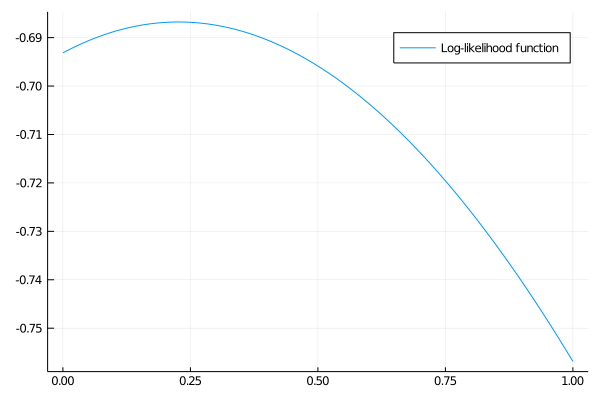

In [79]:
using LinearAlgebra, Statistics, BenchmarkTools, SparseArrays, Random
using Distributions,Plots
using ForwardDiff, Zygote, Optim, JuMP, Ipopt, BlackBoxOptim, Roots, NLsolve, LeastSquaresOptim
using Optim: converged, maximum, maximizer, minimizer, iterations #some extra functions

N = 10000

data = []
for i in 1:N
    ind = [i,i]
    k = [1,2]
    x = [0.0, 1.0]
    e = rand(Gumbel(),2)
    latent = 0.2 .* x 
    y = x
    if latent[1] + e[1] ≥ latent[2] + e[2]
        y = [1.0, 0.0]
    end
    push!(data, hcat(ind, k, x, latent, e, y))
end


function loglikelihood_A1(β)
    l = zeros(N)
    for i in 1:N
        p = exp.(β .* data[i][1:2,3])./sum(exp.(β .* data[i][1:2,3]))
        y = data[i][1:2,6]
        l[i] = y[1]*log(p[1]) + y[2]*log(p[2])
    end
    return mean(l)
end


likelihood_plot = []
beta_range = range(0.0, 1.0, length = 100)
for β in beta_range
    push!(likelihood_plot, loglikelihood_A1(β))
end

plot(beta_range, likelihood_plot, label = "Log-likelihood function")


In [80]:
result = maximize(loglikelihood_A1,-1.0,1.0)

Results of Maximization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [-1.000000, 1.000000]
 * Maximizer: 2.265642e-01
 * Maximum: -6.867717e-01
 * Iterations: 12
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 13

maximize(loglikelihood_A1, -1.0, 1.0) = Results of Maximization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [-1.000000, 1.000000]
 * Maximizer: 2.614797e-01
 * Maximum: -6.846732e-01
 * Iterations: 13
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 14


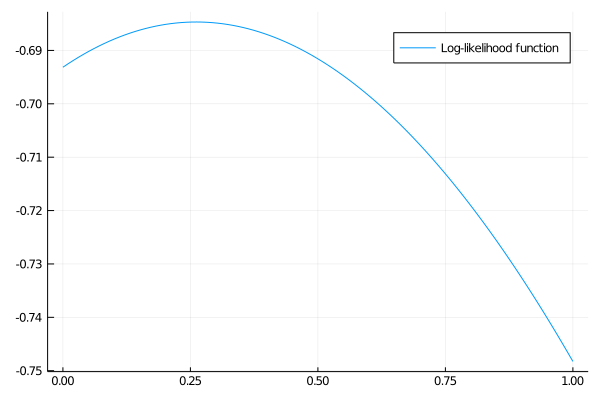

In [83]:
# Without showing the simulated data

N = 1000


function loglikelihood_A2(β)
    l = zeros(N)
    for i in 1:N
        x = [0.0, 1.0]
        e = rand(Gumbel(),2)
        latent = 0.2 .* x 
        y = (latent[1] + e[1] ≥ latent[2] + e[2]) ? [1.0, 0.0] : x
        p = exp.(β .* x)./sum(exp.(β .* x))
        l[i] = y[1]*log(p[1]) + y[2]*log(p[2])
    end
    return mean(l)
end

likelihood_plot = []
beta_range = range(0.0, 1.0, length = 100)
for β in beta_range
    push!(likelihood_plot, loglikelihood_A1(β))
end


@show maximize(loglikelihood_A1,-1.0,1.0)

plot(beta_range, likelihood_plot, label = "Log-likelihood function")
